In [294]:
import pandas as pd

In [295]:
ri=pd.read_csv("police.csv")

In [296]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [297]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' columns
ri.drop(["county_name", 'driver_age_raw',"driver_age"], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 12)


In [298]:
# Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
#        'violation_raw', 'violation', 'search_conducted', 'search_type',
#        'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
#        'district'],
#       dtype='object')


In [299]:
print(ri.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')


In [300]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5335
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


In [301]:
ri.dropna(subset=["driver_gender"],inplace=True)

In [302]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())


stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64


In [303]:
# Examine the shape of the DataFrame
print(ri.shape)

(86406, 12)


In [304]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
dtype: object

In [305]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())



0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [306]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")


In [307]:

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


In [308]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri["stop_time"], sep=" ")

In [309]:
# Convert 'combined' to datetime format
ri['stop_datetime'] =combined

In [310]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55
1,2005-01-18,08:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15
2,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15
4,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00


In [311]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
stop_datetime         object
dtype: object

In [312]:
ri['stop_datetime'] =pd.to_datetime(ri['stop_datetime'])

In [313]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [314]:
# Set 'stop_datetime' as the index
ri.set_index("stop_datetime", inplace=True)



In [315]:
# Examine the index
ri.index


DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)

In [316]:

# Examine the columns
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [317]:
# Count the unique values in 'violation'
ri.violation.value_counts()


Speeding               48461
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [318]:

# Express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

In [319]:
ri.driver_gender.unique()

array(['M', 'F'], dtype=object)

In [320]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=="F"]

In [321]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender=="M"]


In [322]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64


In [323]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


In [324]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=="F") & (ri.violation=="Speeding")]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=="M") & (ri.violation=="Speeding")]


In [325]:

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))


Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
N/D                 0.000840
Arrest Passenger    0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64


In [326]:

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
No Action           0.001061
N/D                 0.001061
Name: stop_outcome, dtype: float64


In [327]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963012
True     0.036988
Name: search_conducted, dtype: float64
0.036988172117677014


In [328]:
# Calculate the search rate for female drivers
print(ri[ri["driver_gender"]=="F"].search_conducted.mean())

0.02003317596018885


In [329]:
# Calculate the search rate for male drivers
print(ri[ri["driver_gender"]=="M"].search_conducted.mean())

0.04332617855155418


In [330]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby("driver_gender").search_conducted.mean())

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64


In [331]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(["driver_gender","violation"]).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64


In [332]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(["violation","driver_gender"]).search_conducted.mean())

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64


In [333]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86406 entries, 2005-01-02 01:55:00 to 2015-12-31 22:46:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86406 non-null  object
 1   stop_time           86406 non-null  object
 2   driver_gender       86406 non-null  object
 3   driver_race         86406 non-null  object
 4   violation_raw       86406 non-null  object
 5   violation           86406 non-null  object
 6   search_conducted    86406 non-null  bool  
 7   search_type         3196 non-null   object
 8   stop_outcome        86406 non-null  object
 9   is_arrested         86406 non-null  bool  
 10  stop_duration       86406 non-null  object
 11  drugs_related_stop  86406 non-null  bool  
dtypes: bool(3), object(9)
memory usage: 6.8+ MB


In [334]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83210
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

In [335]:
ri.search_type.unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',

In [336]:
ri["Inventory"]=ri.search_type.str.contains("Inventory",na=False)

In [337]:
searched=ri[ri.search_conducted==True]

In [338]:
searched.Inventory.mean()

0.13735919899874843

In [339]:
# Count the 'search_type' values
ri["search_type"].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [340]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Inventory
stop_datetime,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
2005-01-18 08:15:00,2005-01-18,08:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False


In [341]:
# Count the 'search_type' values
print(ri["search_type"].value_counts())


Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [342]:

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

bool
274


In [343]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender")["frisk"].mean())

0.08573216520650813
driver_gender
F    0.061571
M    0.089908
Name: frisk, dtype: float64


In [344]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())


0.03389810892762077


In [345]:

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)["is_arrested"].mean())


stop_datetime
0     0.047393
1     0.061428
2     0.062914
3     0.053221
4     0.074074
5     0.031915
6     0.014045
7     0.013498
8     0.020449
9     0.024703
10    0.025278
11    0.027037
12    0.032999
13    0.030100
14    0.032716
15    0.032307
16    0.030765
17    0.032757
18    0.043988
19    0.031506
20    0.041048
21    0.053795
22    0.043397
23    0.042825
Name: is_arrested, dtype: float64


In [346]:

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

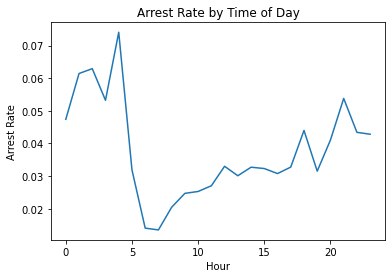

In [347]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [348]:
ri.drugs_related_stop.unique()

array([False,  True])

In [349]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("Y").mean())

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [350]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()


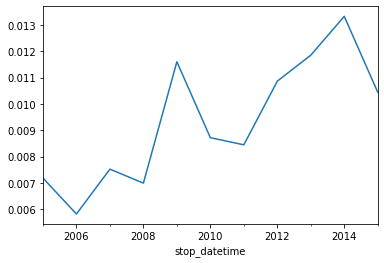

In [351]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

In [352]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample("A").mean()



In [353]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)


In [354]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.007186,0.051098
2006-12-31,0.005818,0.040134
2007-12-31,0.007524,0.040876
2008-12-31,0.006993,0.036069
2009-12-31,0.011607,0.052646
2010-12-31,0.008721,0.041458
2011-12-31,0.008449,0.036436
2012-12-31,0.010870,0.034052
2013-12-31,0.011858,0.027624


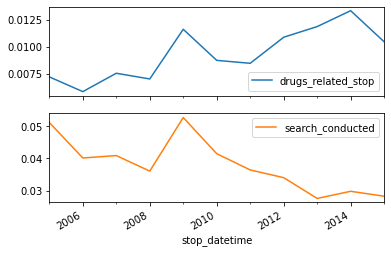

In [355]:

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [357]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']


In [358]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23, '30+ Min':45, '2':2 ,'1':1}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8 23 45  2  1]


In [359]:
ri.stop_minutes.dtype

dtype('int64')

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.899532
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577598
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64


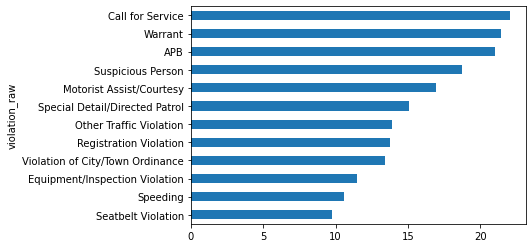

In [360]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw")["stop_minutes"].mean())

# Save the resulting Series as 'stop_length'
stop_length =ri.groupby("violation_raw")["stop_minutes"].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()
stop_length.sort_values().plot(kind="barh")

# Display the plot
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


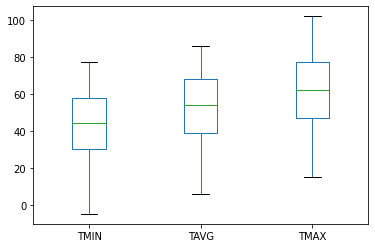

In [361]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())
temp=weather[['TMIN', 'TAVG', 'TMAX']]
# Create a box plot of the temperature columns
temp.plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


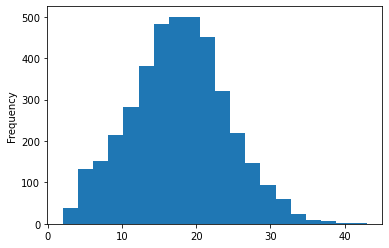

In [362]:
# Create a 'TDIFF' column that represents temperature difference
weather["TDIFF"]=weather.TMAX -weather.TMIN

# Describe the 'TDIFF' column
print(weather["TDIFF"].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather["TDIFF"].plot(kind="hist",bins=20)

# Display the plot
plt.show()

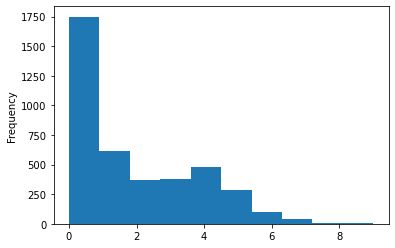

In [363]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,"WT01":"WT22"]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind="hist")

# Display the plot
plt.show()

In [364]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:"bad",4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse",}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [365]:
# Create a list of weather ratings in logical order
cats=['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype("category" )

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']


In [366]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather.loc[:,["DATE","rating"]]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-02 01:55:00  2005-01-02     01:55             M       White   
1 2005-01-18 08:15:00  2005-01-18     08:15             M       White   
2 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-03-14 10:00:00  2005-03-14     10:00             F       White   

      violation_raw violation  search_conducted search_type   stop_outcome  \
0          Speeding  Speeding             False         NaN       Citation   
1          Speeding  Speeding             False         NaN       Citation   
2          Speeding  Speeding             False         NaN       Citation   
3  Call for Service     Other             False         NaN  Arrest Driver   
4          Speeding  Speeding             False         NaN       Citation   

   is_arrested stop_duration  drugs_related_stop  Inventory  frisk  \
0        False      0-

In [367]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86406, 16)
(86406, 18)


In [368]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.03389810892762077


In [369]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby("rating")["is_arrested"].mean())

rating
bad      0.034378
good     0.032453
worse    0.039107
Name: is_arrested, dtype: float64


In [370]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(["violation","rating"])["is_arrested"].mean())

violation            rating
Equipment            bad       0.058137
                     good      0.051874
                     worse     0.098385
Moving violation     bad       0.054080
                     good      0.056034
                     worse     0.066807
Other                bad       0.085547
                     good      0.080735
                     worse     0.051643
Registration/plates  bad       0.110013
                     good      0.085227
                     worse     0.096970
Seat belt            bad       0.019196
                     good      0.028602
                     worse     0.000000
Speeding             bad       0.013237
                     good      0.012606
                     worse     0.015361
Name: is_arrested, dtype: float64


In [371]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad       0.058137
                     good      0.051874
                     worse     0.098385
Moving violation     bad       0.054080
                     good      0.056034
                     worse     0.066807
Other                bad       0.085547
                     good      0.080735
                     worse     0.051643
Registration/plates  bad       0.110013
                     good      0.085227
                     worse     0.096970
Seat belt            bad       0.019196
                     good      0.028602
                     worse     0.000000
Speeding             bad       0.013237
                     good      0.012606
                     worse     0.015361
Name: is_arrested, dtype: float64
0.054079696394686905
rating
bad      0.013237
good     0.012606
worse    0.015361
Name: is_arrested, dtype: float64


In [372]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.058137  0.051874  0.098385
Moving violation     0.054080  0.056034  0.066807
Other                0.085547  0.080735  0.051643
Registration/plates  0.110013  0.085227  0.096970
Seat belt            0.019196  0.028602  0.000000
Speeding             0.013237  0.012606  0.015361
rating                    bad      good     worse
violation                                        
Equipment            0.058137  0.051874  0.098385
Moving violation     0.054080  0.056034  0.066807
Other                0.085547  0.080735  0.051643
Registration/plates  0.110013  0.085227  0.096970
Seat belt            0.019196  0.028602  0.000000
Speeding             0.013237  0.012606  0.015361


In [1]:
import datetime as dt

In [3]:
c=dt.date.today()

In [4]:
c.year

2020

In [5]:
c.month

9

In [6]:
c.day

27

In [9]:
dt.time

datetime.time